<a href="https://colab.research.google.com/github/mliborio2020/curso_ciencia_dados2021/blob/master/Trabalho_Final_Marcos_Liborio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final - Ciência de Dados - Enap / 2021
#### Marcos Libório Fernandes Costa

##### O objetivo deste trabalho foi analisar se a capacidade tributária dos **Fundos de Investimento Imobiliário** está coerente com reportagem recente acerca de suposta sonegação no setor: **Receita identifica irregularidades em fundos imobiliários que causaram prejuízo de até R$ 550 milhões** (https://g1.globo.com/sp/sao-paulo/noticia/2020/10/30/receita-mira-irregularidades-de-ate-r-550-milhoes-em-fundos-imobiliarios.ghtml). A consulta foi feita em bases abertas da CVM, para identificar o possível *gap tributário*.</p>
##### Os Fundos imobiliários (**FII**) são uma classe de fundos estruturados que tem por objetivo investir em empreendimentos imobiliários, que podem ser tanto imóveis prontos para locação quanto certificados de recebíveis de dívidas (CRI). São organizados em forma de condomínio e normalmente ter suas cotas negociadas em mercado de bolsa ou balcão. No caso, ambas atividades estão centralizadas na **B3**.
##### Para incentivar sua utilização pelo grande público, os FIIs foram agraciados com diversos benefícios tributários, sendo que o principal é a isenção de imposto de renda sobre os rendimentos distribuidos aos cotistas, atendidas as condições legais.
##### Como se viu na reportagem, estima-se que haja um gap anual de 550 milhões atualmente, ou seja, os FIIs estariam recolhendo um montante muito inferior ao potencial. É isso que nos propomos analisar aqui. Como os dados de arrecadação por FII (ou mesmo agregados por Administradora) são protegidos pelo sigilo fiscal, somente se avaliará se o montante total está coerente com essa estimativa.
##### A data-base dos valores levantados é dezembro de 2020.

### Apresentação do Dataset

##### O Dataset é o resultado da agregação de três bases de dados distintas:


*   O cadastro de Fundos estruturados da CVM;
*   A relação de Administradoras desses fundos;
*   O valor do PL (Patrimônio Líquido) dos fundos;

##### O Dataset resultante (**df**) foi então submetido a um tratamento e filtragem pelos seguintes campos:

*   **TP_FUNDO** = "F.I.I.": com isso, obteve-se apenas a lista de fundos estruturados do tipo FII (Fundo imobiliário);
*   **SIT** = "EM FUNCIONAMENTO NORMAL": esse filtro serviu para excluir as ocorrências de fundos já encerrados e pré-operacionais;

##### No mesmo processo foram selecionadas as colunas que interessam ao estudo:

*   **CNPJ_FUNDO**: contendo o CNPJ de cada FII;
*   **DENOM_SOCIAL**: contendo o Nome de cada FII;
*   **CNPJ_ADMIN**: contendo o CNPJ da Administradora correspondente;
*   **ADMIN**: contendo o Nome da Administradora;
*   **VL_PATRIM_LIQ**: contendo os valores do Patrimônio Líquido de cada FII;

##### Foi então calculada a coluna a seguir, a partir da coluna **VL_PATRIM_LIQ**:

*   **Trib_Potencial**: resultado da multiplicação do PL de cada FII por 0.5 (que é o percentual estimado de sonegação, ou seja, de 50%), depois por 0.066 (que é o retorno médio anual do IFIX para o ano de 2020, o que nos dá o resultado esperado por PL), depois por 0.95 (que é o payout, ou seja, o percentual que deve ser distribuído do resultado. Legalmente deve ser distribuído pelo menos 95% do lucro semestralmente), depois por 0.2 (que é a alíquota do imposto de renda a ser retido na distribuição dos resultados);

##### Obteve-se então o Dataset **df_FII**, que foi sorteado pela coluna de tributo potencial. Esse Dataset possui **562** registros.
##### Como o objetivo era exibir os dados de forma agregada, houve então o agrupamento por **Administradora**, resultando no Dataset **df_ADM_total**, com **53** registros, sorteados pelo valor do tributo.
##### A partir desse Dataset, foram elaborados os gráficos.







#### Link para Download do Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import pandas as pd
import numpy as np
# Dados CVM: http://dados.cvm.gov.br/dados/FIE/CAD/DADOS/cad_fie.zip
# Foram importados dois arquivos csv desse zip para o Colab: cad_fie e cad_fie_admin
path_cvm = '/content/drive/MyDrive/CienciadeDados/cad_fie.csv'
path_adm = '/content/drive/MyDrive/CienciadeDados/cad_fie_admin.csv'
# O terceiro arquivo traz o Patrimonio Liquido dos Fundos (data base dez/2020). É buscado diretamente do site, pois já está em CSV
path_PL = 'http://dados.cvm.gov.br/dados/FIE/MEDIDAS/DADOS/medidas_mes_fie_202012.csv'
# Lidos os três arquivos e salvos nas respectivas variáveis
cvm = pd.read_csv(path_cvm, sep=';', encoding='latin-1')
adm = pd.read_csv(path_adm, sep=';', encoding='latin-1')
PL = pd.read_csv(path_PL, sep=';', encoding='latin-1')
# Gerados os três Data Frames a partir dos arquivos lidos anteriormente
cvm_frame = pd.DataFrame(cvm)
adm_frame = pd.DataFrame(adm)
PL_frame = pd.DataFrame(PL)
# Feito o merge dos três arquivos, dois a dois. A chave é o CNPJ_FUNDO, presente nos três Data Frames.
df_partial = pd.merge(cvm_frame, PL_frame)
df = pd.merge(df_partial, adm_frame)
# df = pd.DataFrame.insert(loc=1, column='rate', value=6, allow_duplicates=True)
#Corrige formatação do VL_PATRIM_LIQ de notação científica para 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format
df['Trib_Potencial'] = df['VL_PATRIM_LIQ'] * 0.5 * 0.066 * 0.95 * 0.2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 0 to 2913
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TP_FUNDO        2914 non-null   object 
 1   CNPJ_FUNDO      2914 non-null   object 
 2   DENOM_SOCIAL    2914 non-null   object 
 3   DT_REG          2914 non-null   object 
 4   DT_CONST        2817 non-null   object 
 5   DT_CANCEL       10 non-null     object 
 6   SIT             2914 non-null   object 
 7   DT_INI_SIT      2914 non-null   object 
 8   DT_INI_EXERC    2902 non-null   object 
 9   DT_FIM_EXERC    2902 non-null   object 
 10  ENTID_INVEST    1119 non-null   object 
 11  DT_COMPTC       2914 non-null   object 
 12  VL_PATRIM_LIQ   2914 non-null   float64
 13  NR_COTST        1129 non-null   float64
 14  CNPJ_ADMIN      2914 non-null   object 
 15  ADMIN           2914 non-null   object 
 16  Trib_Potencial  2914 non-null   float64
dtypes: float64(3), object(14)
memory 

### Motivação Pessoal

Eu trabalho na Receita Federal em um projeto de verificação da conformidade tributária dos FII.             A intenção é desenvolver um modelo que possa indicar o gap tributário e as possíveis áreas de evasão / elisão.

In [64]:
quartis = df.quantile([.25, .5, .75, .9])
# Seleciona apenas os fundos do tipo FII
FII_only = df['TP_FUNDO']=='F.I.I.'
# Seleciona apenas os fundos ativos
Active_only = df['SIT']=='EM FUNCIONAMENTO NORMAL'
# Aplica os filtros 
df_FII = df.loc[FII_only & Active_only]
# Define as colunas a serem exibidas
df_FII=df_FII[['CNPJ_FUNDO', 'DENOM_SOCIAL', 'CNPJ_ADMIN','ADMIN', 'VL_PATRIM_LIQ', 'Trib_Potencial']]
# df_FII=df_FII[['CNPJ_FUNDO', 'DENOM_SOCIAL', 'DT_CONST', 'CNPJ_ADMIN','ADMIN', 'VL_PATRIM_LIQ']]
quartis_FII = df_FII.quantile([.25, .5, .75, .9])
# Permite o filtro por Administradora. A relação entre Administradora e FII é de 1 para N.
df_ADM = df_FII['ADMIN']=='BANCO DAYCOVAL S.A.'
df_por_ADM = df_FII.loc[df_ADM]
# df_por_ADM
df_FII.sort_values(by='VL_PATRIM_LIQ',
                   axis=0,
                   ascending=False,
                   inplace=False,
                   kind='quicksort',
                   na_position='last')
# df_FII


,CNPJ_FUNDO,DENOM_SOCIAL,CNPJ_ADMIN,ADMIN,VL_PATRIM_LIQ,Trib_Potencial
364,24.960.430/0001-13,KINEA ÍNDICES DE PREÇOS FUNDO DE INVESTIMENTO ...,62.418.140/0001-31,INTRAG DTVM LTDA.,4376378861.38,27439895.46
366,16.706.958/0001-32,KINEA RENDIMENTOS IMOBILIARIOS FUNDO DE INVEST...,62.418.140/0001-31,INTRAG DTVM LTDA.,3837410176.85,24060561.81
365,12.005.956/0001-65,KINEA RENDA IMOBILIÁRIA FUNDO DE INVESTIMENTO ...,62.418.140/0001-31,INTRAG DTVM LTDA.,3748109137.86,23500644.29
439,31.962.875/0001-06,PROLOGIS BRAZIL LOGISTICS VENTURE FUNDO DE INV...,13.486.793/0001-42,BRL TRUST DISTRIBUIDORA DE TITULOS E VALORES M...,3386081058.44,21230728.24
1,19.419.994/0001-03,2509 FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII,36.113.876/0001-91,OLIVEIRA TRUST DTVM S.A.,3019562828.63,18932658.94
...,...,...,...,...,...,...
558,18.265.829/0001-81,YAGO - FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII,13.486.793/0001-42,BRL TRUST DISTRIBUIDORA DE TITULOS E VALORES M...,-1508684.92,-9459.45
474,13.012.312/0001-67,SALUS FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII,15.489.568/0001-95,INTRADER DTVM LTDA,-3663199.00,-22968.26
252,00.613.094/0001-74,FUNDO DE INVESTIMENTO IMOBILIÁRIO PANAMBY,33.923.111/0001-29,BRKB DISTRIBUIDORA DE TITULOS E VALORES MOBILI...,-4523815.85,-28364.33
440,13.125.823/0001-95,PSG - FUNDO DE INVESTIMENTO IMOBILIÁRIO,13.486.793/0001-42,BRL TRUST DISTRIBUIDORA DE TITULOS E VALORES M...,-4927911.32,-30898.00


In [66]:
# Agrupando os dados por Administradora
grouped = df_FII.groupby(['ADMIN']).sum().reset_index()
df_ADM_total = pd.DataFrame(grouped)
df_ADM_total

,ADMIN,VL_PATRIM_LIQ,Trib_Potencial
0,BANCO BNP PARIBAS BRASIL S/A,148808937.73,933032.04
1,BANCO BRADESCO S.A.,437052939.14,2740321.93
2,BANCO DAYCOVAL S.A.,63460973.77,397900.31
3,BANCO FATOR S/A,1035812344.35,6494543.40
4,BANCO FINAXIS S.A.,25319527.94,158753.44
5,BANCO J. SAFRA S.A.,2363325622.47,14818051.65
6,BANCO MODAL S.A.,144332591.51,904965.35
7,BANCO OURINVEST S.A.,3524629837.07,22099429.08
8,BANCOOB DISTRIBUIDORA DE TÍTULOS E VALORES MOB...,32548423.42,204078.61
9,BB GESTAO DE RECURSOS DTVM S.A,455520770.90,2856115.23


##### O número de Administradoras é 53

In [52]:
counted = df_ADM_total.count()
print(f'Numero de Administradoras: {counted}')

Numero de Administradoras: ADMIN             53
VL_PATRIM_LIQ     53
Trib_Potencial    53
dtype: int64


##### A seguir mais alguns valores estatísticos extraídos do Dataset df_ADM_total:

In [54]:
media = df_ADM_total.mean()
print(f'Média: {media}')

Média: VL_PATRIM_LIQ    3364065898.01
Trib_Potencial     21092693.18
dtype: float64


In [55]:
mediana = df_ADM_total.median()
print(f'Mediana: {mediana}')

Mediana: VL_PATRIM_LIQ    1046477485.62
Trib_Potencial      6561413.83
dtype: float64


##### Chegou-se ao valor de PL total dos FIIs de **178.295.492.594**, e de tributação potencial de **1.117.912.738** ao ano.

In [56]:
soma = df_ADM_total.sum()
print(f'Total: {soma}')

Total: ADMIN             BANCO BNP PARIBAS BRASIL S/ABANCO BRADESCO S.A...
VL_PATRIM_LIQ                                       178295492594.65
Trib_Potencial                                        1117912738.57
dtype: object


In [57]:
# df_ADM_total.info()
quartis_ADM = df_ADM_total.quantile([.25, .5, .75, .9])
quartis_ADM

,VL_PATRIM_LIQ,Trib_Potencial
0.25,143378454.01,898982.91
0.50,1046477485.62,6561413.83
0.75,3041699250.96,19071454.30
0.90,8930194253.85,55992317.97


##### Assim, haveria um potencial de arrecadação de tributos incidentes sobre a distribuição de resultados de FII da ordem de **R 1,1 Bi** ao ano. Isso considerando um PL total de **R 178 Bi**

### Investigação

In [6]:
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib
import re

Esse gráfico expressa a tributação potencial esperada, por Administradora

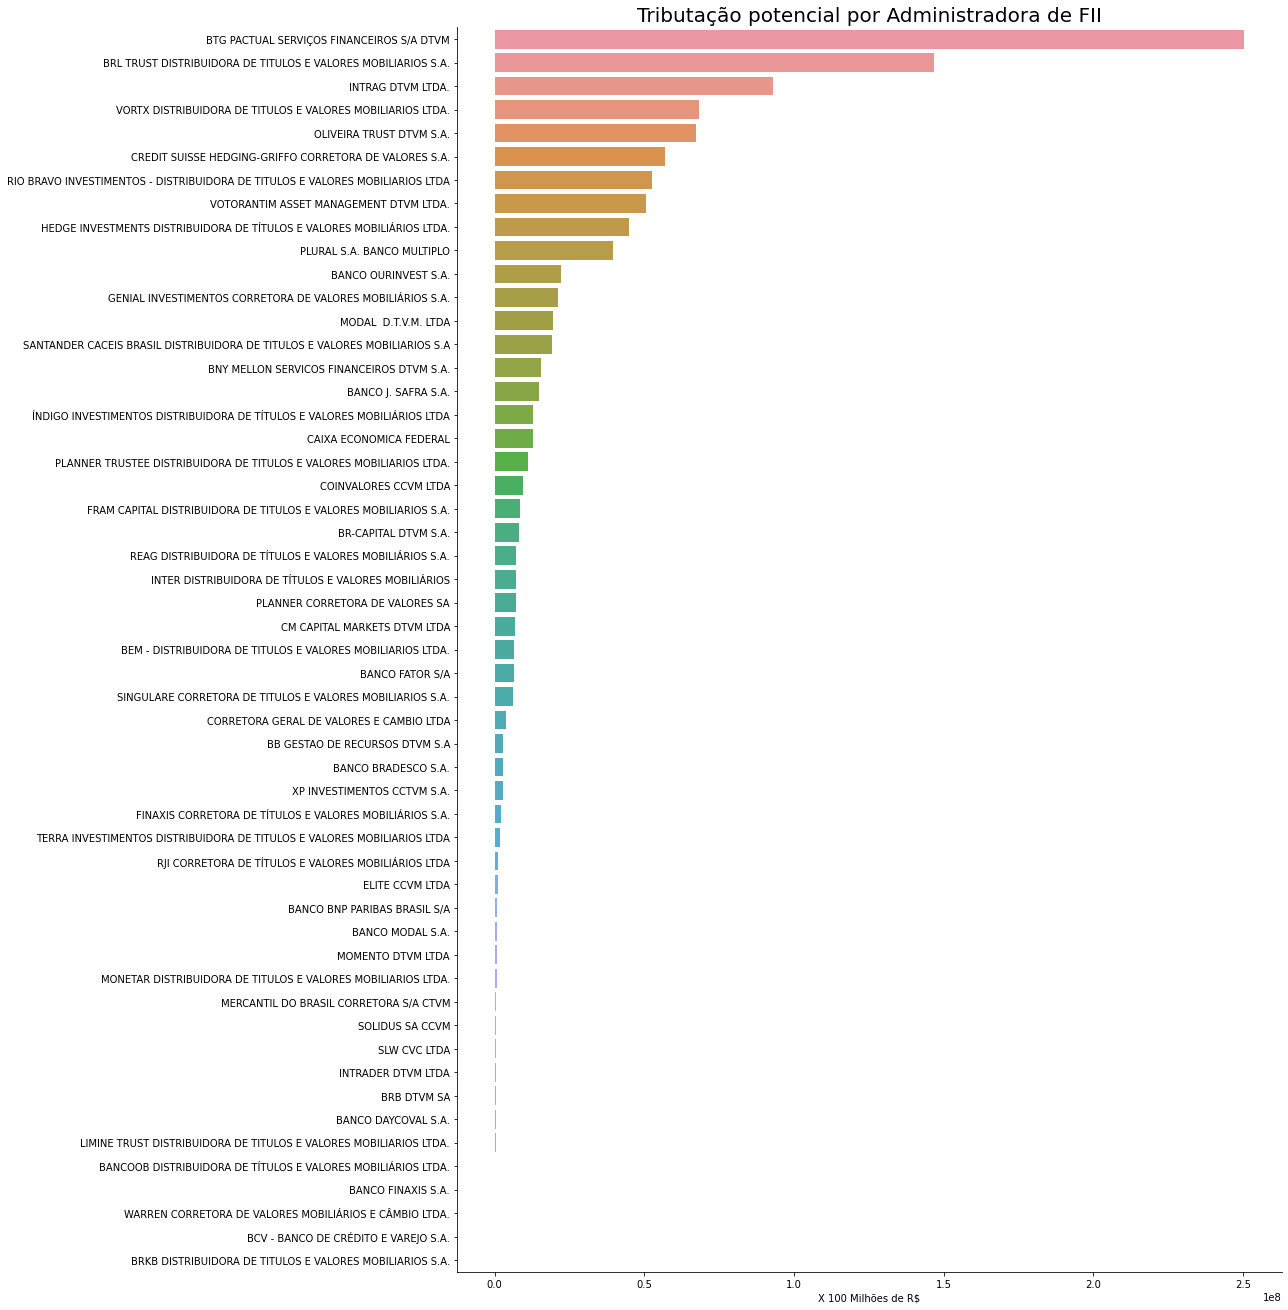

In [58]:
# df_ADM_total.options.display.float_format = '{:.2f}'.format
sorted = df_ADM_total.sort_values(by='Trib_Potencial', axis=0, ascending=False)
plot = sns.catplot(y="ADMIN", x="Trib_Potencial", kind="bar", data=sorted, aspect=1, height=18, orient='h', legend=True)
plot.set(xlabel='X 100 Milhões de R$', ylabel='')
plot = plt.title("Tributação potencial por Administradora de FII", fontsize=20)

##### Já o boxplot a seguir demonstra que a maior parte dos valores (75%) se concentra abaixo dos **R$ 30 milhões**. 

[Text(0, 0.5, ''), Text(0.5, 0, 'X 10 Milhões de R$')]

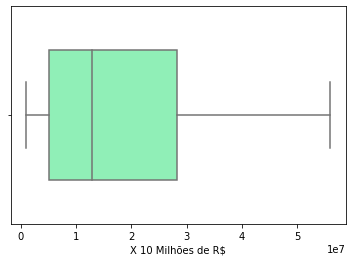

In [61]:
box = sns.boxplot(x='Trib_Potencial', data=quartis_ADM, palette='rainbow', width=0.6)
box.set(xlabel='X 10 Milhões de R$', ylabel='')

### Conclusões e Achados

##### Do conjunto de dados levantado, verificou-se que existem atualmente **562** FIIs Ativos e **53** Administradoras. Essas administram um Patrimônio total de 178.295.492.594 (**178 Bilhões** de reais).
##### Pelos cálculos efetuados, a partir das premissas expostas na reportagem que conduziu esta análise, verificou-se que há uma tributação potencial de **R$ 1,1 Bilhão** anualmente.
##### Importante lembrar as limitações deste estudo, ao não considerar mais variáveis pois elas não se encontram disponíveis, podendo afetar essas estimativas. São elas:

*   A crise da covid-19, que afetou negativamente os resultados de parte do setor no ano de 2020; Embora esse fenômeno possa ter sido mitigado pela diversificação do setor (shoppings e lages corporativas caíram mas galpões logísticos subiram muito), é fato que o índice IFIX caiu em relação a 2019. Na prática, PL não significaria automaticamente rendimentos, o que comprometeria a metodologia de cálculo utilizada.
*   Há diferentes tipos de FIIs, que remuneram de formas diferentes seus cotistas. Em geral os FIIs são voltados para a renda, distribuindo mensalmente seus proventos. Porém, há FIIs de desenvolvimento, que se prestam à construção de empreendimentos e posterior venda ou locação. Durante o período da construção não há renda a ser distribuída, o que pode afetar os cálculos se considerarmos apenas o período de 1 ano. Não temos a informação sobre qual seria a proporção de FIIs de desenvolvimento, embora o mercado seja predominantemente de FIIs de renda.
*   A indisponibilidade das informações de efetivo recolhimento dos tributos, tanto globalmente pelo setor, quanto por Administradora. Essas informações, como se sabe, estão protegidas pelo sigilo fiscal. Isso nos impede de avaliar exatamente o tamanho do *gap*, e se ele existe de fato.

##### Dessa forma, dadas as limitações impostas ao estudo, podemos concluir apenas que os números informados na reportagem (**550 milhões** sonegados) estão coerentes com a arrecadação potencial do setor de Fundos imobiliários (**1,1 bilhão**), representando um *gap* de 50%.
